<a href="https://colab.research.google.com/github/ankeet0008/Ma-lab-emperiment-Code-Creaters/blob/main/Ma%20lab%20exps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#program 8- consider a database use random forest to predict the output class vans the number of trees as follows and compare the result is a=1,b=3,c=5,d=7,e=11

In [24]:
# Cell 1: Import Required Libraries
# ==================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [25]:
# Cell 2: Load and Explore Dataset
# =================================

# Load Iris Dataset
data = load_iris()
X = data.data
y = data.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("="*60)
print("📊 DATASET INFORMATION")
print("="*60)
print(f"\n📌 Dataset: Iris Dataset")
print(f"📌 Total Samples: {X.shape[0]}")
print(f"📌 Number of Features: {X.shape[1]}")
print(f"📌 Feature Names: {data.feature_names}")
print(f"📌 Target Classes: {list(data.target_names)}")

print("\n📋 First 10 rows of dataset:")
df.head(10)

📊 DATASET INFORMATION

📌 Dataset: Iris Dataset
📌 Total Samples: 150
📌 Number of Features: 4
📌 Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
📌 Target Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

📋 First 10 rows of dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


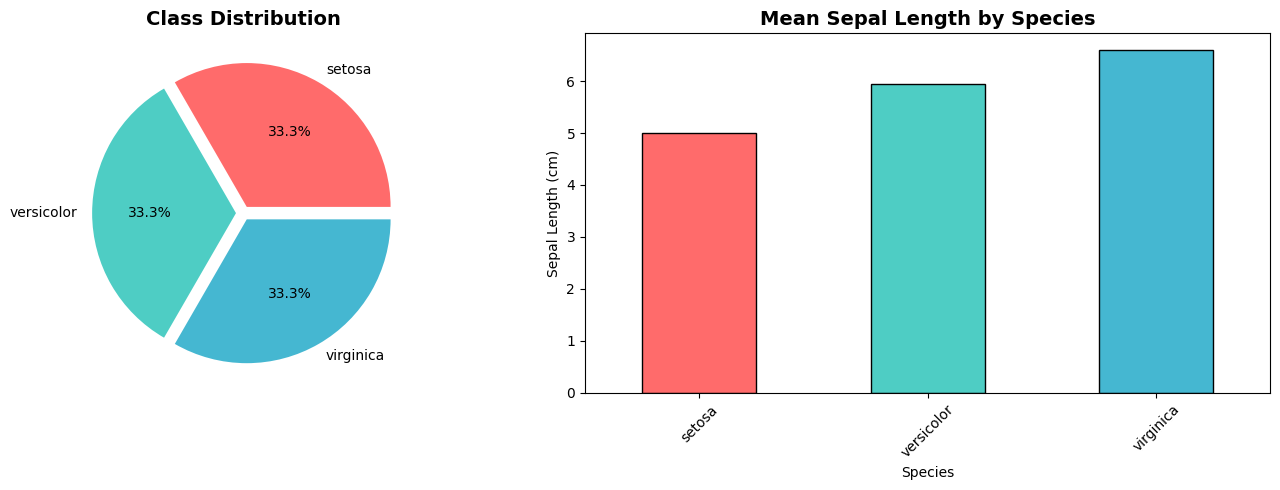

In [26]:
# Cell 3: Data Visualization
# ===========================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Class Distribution
class_counts = df['species'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[0].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, explode=(0.05, 0.05, 0.05))
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')

# Plot 2: Feature Distribution
df.groupby('species')[data.feature_names[0]].mean().plot(
    kind='bar', ax=axes[1], color=colors, edgecolor='black'
)
axes[1].set_title('Mean Sepal Length by Species', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length (cm)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [27]:
# Cell 4: Split Dataset into Training and Testing
# ================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("="*60)
print("📂 DATA SPLITTING")
print("="*60)
print(f"\n✅ Training Samples: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"✅ Testing Samples: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.0f}%)")
print(f"\n📊 Training set shape: {X_train.shape}")
print(f"📊 Testing set shape: {X_test.shape}")

📂 DATA SPLITTING

✅ Training Samples: 105 (70%)
✅ Testing Samples: 45 (30%)

📊 Training set shape: (105, 4)
📊 Testing set shape: (45, 4)


In [28]:
# Cell 5: Define Number of Trees as per Question
# ===============================================

# As per question: a=1, b=3, c=5, d=7, e=11
n_trees_config = {
    'a': 1,
    'b': 3,
    'c': 5,
    'd': 7,
    'e': 11
}

print("="*60)
print("🌲 RANDOM FOREST TREE CONFIGURATIONS")
print("="*60)
print("\nNumber of trees to compare:")
print("-" * 30)

for label, trees in n_trees_config.items():
    print(f"   {label} = {trees} tree(s)")

print("-" * 30)

🌲 RANDOM FOREST TREE CONFIGURATIONS

Number of trees to compare:
------------------------------
   a = 1 tree(s)
   b = 3 tree(s)
   c = 5 tree(s)
   d = 7 tree(s)
   e = 11 tree(s)
------------------------------


In [29]:
# Cell 6: Train Random Forest with Different Number of Trees
# ===========================================================

print("="*60)
print("🚀 TRAINING RANDOM FOREST MODELS")
print("="*60)

# Store results
results = []
models = {}
predictions = {}

for label, trees in n_trees_config.items():
    print(f"\n🌲 Training with {label} = {trees} tree(s)...")

    # Create Random Forest Classifier
    rf_model = RandomForestClassifier(
        n_estimators=trees,
        random_state=42,
        n_jobs=-1
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100

    # Store model and predictions
    models[label] = rf_model
    predictions[label] = y_pred

    # Store results
    results.append({
        'Label': label,
        'Number of Trees': trees,
        'Accuracy (%)': round(accuracy, 2),
        'Correct Predictions': sum(y_pred == y_test),
        'Wrong Predictions': sum(y_pred != y_test)
    })

    print(f"   ✅ Accuracy: {accuracy:.2f}%")

print("\n" + "="*60)
print("✅ ALL MODELS TRAINED SUCCESSFULLY!")
print("="*60)

🚀 TRAINING RANDOM FOREST MODELS

🌲 Training with a = 1 tree(s)...
   ✅ Accuracy: 86.67%

🌲 Training with b = 3 tree(s)...
   ✅ Accuracy: 88.89%

🌲 Training with c = 5 tree(s)...
   ✅ Accuracy: 91.11%

🌲 Training with d = 7 tree(s)...
   ✅ Accuracy: 91.11%

🌲 Training with e = 11 tree(s)...
   ✅ Accuracy: 91.11%

✅ ALL MODELS TRAINED SUCCESSFULLY!


In [30]:
# Cell 7: Display Results Comparison Table
# =========================================

print("="*60)
print("📊 RESULTS COMPARISON TABLE")
print("="*60)

# Create DataFrame
df_results = pd.DataFrame(results)

# Display styled table
print("\n")
display(df_results.style.background_gradient(
    subset=['Accuracy (%)'],
    cmap='Greens'
).set_properties(**{
    'text-align': 'center',
    'font-size': '12pt'
}))

# Print summary
print("\n" + "-"*60)
best = df_results.loc[df_results['Accuracy (%)'].idxmax()]
worst = df_results.loc[df_results['Accuracy (%)'].idxmin()]

print(f"\n🏆 BEST CONFIGURATION:")
print(f"   Label: {best['Label']}")
print(f"   Trees: {best['Number of Trees']}")
print(f"   Accuracy: {best['Accuracy (%)']}%")

print(f"\n⚠️ LOWEST CONFIGURATION:")
print(f"   Label: {worst['Label']}")
print(f"   Trees: {worst['Number of Trees']}")
print(f"   Accuracy: {worst['Accuracy (%)']}%")

📊 RESULTS COMPARISON TABLE




,Label,Number of Trees,Accuracy (%),Correct Predictions,Wrong Predictions
0,a,1,86.670000,39,6
1,b,3,88.890000,40,5
2,c,5,91.110000,41,4
3,d,7,91.110000,41,4
4,e,11,91.110000,41,4



------------------------------------------------------------

🏆 BEST CONFIGURATION:
   Label: c
   Trees: 5
   Accuracy: 91.11%

⚠️ LOWEST CONFIGURATION:
   Label: a
   Trees: 1
   Accuracy: 86.67%
